In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('vaccine-hesitancy.csv')

In [3]:
df

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1131,"Wilcox County, Alabama",ALABAMA,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1129,"Washington County, Alabama",ALABAMA,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1133,"Winston County, Alabama",ALABAMA,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1127,"Walker County, Alabama",ALABAMA,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,2013,"Aleutians East Borough, Alaska",ALASKA,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,POINT (-151.631889 63.631126),AK,"MULTIPOLYGON (((-165.036163 54.576598, -165.01...","MULTIPOLYGON (((-165.254162 60.917108, -165.30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.18,0.11,0.81,Very High Concern,0.30,Low Concern,0.195,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-87.994171 43.19255, -87.99331...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.18,0.10,0.28,Low Concern,0.31,Low Concern,0.294,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3139,56001,"Albany County, Wyoming",WYOMING,0.30,0.16,0.25,Low Concern,0.63,High Concern,0.192,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,POINT (-107.55145 42.999627),WY,MULTIPOLYGON (((-106.071399 41.530719999999995...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
3140,55067,"Langlade County, Wisconsin",WISCONSIN,0.17,0.10,0.35,Low Concern,0.19,Very Low Concern,0.210,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-89.42472 45.293175, -89.42473...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


In [4]:
df.State = df.State.str.title()

In [5]:
df.describe()

,FIPS Code,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
count,3142.000000,3142.000000,3142.000000,3141.000000,3142.000000,2826.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,0.195159,0.092231,0.500000,0.499965,0.188573,0.094184,0.018463,0.013621,0.089259,0.000919,0.762499
std,15162.508374,0.046295,0.029343,0.288842,0.288832,0.077621,0.138647,0.076340,0.027665,0.144283,0.006240,0.202157
min,1001.000000,0.060000,0.020000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006900
25%,18177.500000,0.170000,0.070000,0.250000,0.250000,0.148000,0.022200,0.001200,0.002800,0.006500,0.000000,0.644450
50%,29176.000000,0.190000,0.090000,0.500000,0.500000,0.188000,0.042300,0.002800,0.006100,0.021900,0.000100,0.837400
75%,45080.500000,0.220000,0.110000,0.750000,0.750000,0.229000,0.096800,0.006900,0.012800,0.098400,0.000600,0.924875
max,56045.000000,0.320000,0.200000,1.000000,1.000000,0.912000,0.991700,0.919000,0.417300,0.872300,0.272700,1.000000


![Map of Estimated Hesitancy](hesitancy_map.png "Hesitancy Map")

![Map of Estimated Strong Hesitancy](stronghesitancymap.png "Strong Hesitancy Map")

In [6]:
pol = pd.read_csv('president_county_candidate.csv')

In [7]:
pol['County Name'] = pol.county.astype(str) + ', ' + pol.state.astype(str)
pol = pol.drop(['state', 'county', 'candidate', 'won'], axis=1)

In [8]:
pol

,party,total_votes,County Name
0,DEM,44552,"Kent County, Delaware"
1,REP,41009,"Kent County, Delaware"
2,LIB,1044,"Kent County, Delaware"
3,GRN,420,"Kent County, Delaware"
4,DEM,195034,"New Castle County, Delaware"
...,...,...,...
32172,WRI,1331,"Maricopa County, Arizona"
32173,REP,78535,"Mohave County, Arizona"
32174,DEM,24831,"Mohave County, Arizona"
32175,LIB,1302,"Mohave County, Arizona"


In [9]:
pivoted = pd.pivot_table(pol, values='total_votes', index='County Name', columns='party')

In [10]:
pivoted = pivoted.fillna(0)
pivoted['Total'] = pivoted.sum(axis=1)
pivoted = pivoted[['DEM', 'REP', 'GRN', 'LIB', 'Total']]

In [11]:
pivoted=pivoted.reset_index()
pivoted

party,County Name,DEM,REP,GRN,LIB,Total
0,"Abbeville County, South Carolina",4101.0,8215.0,23.0,88.0,12433.000000
1,"Abbot, Maine",121.0,288.0,1.0,7.0,417.000000
2,"Abington, Massachusetts",5209.0,4236.0,45.0,146.0,9660.000000
3,"Acadia Parish, Louisiana",5443.0,22596.0,0.0,241.0,28364.250000
4,"Accomack County, Virginia",7578.0,9172.0,0.0,188.0,16962.000000
...,...,...,...,...,...,...
4628,"Yuma County, Arizona",32210.0,36534.0,0.0,1137.0,69926.000000
4629,"Yuma County, Colorado",785.0,4107.0,2.0,52.0,4967.666667
4630,"Zapata County, Texas",1826.0,2033.0,4.0,11.0,3874.000000
4631,"Zavala County, Texas",2864.0,1490.0,12.0,13.0,4379.000000


In [12]:
combined = df.merge(pivoted, on='County Name')

In [13]:
combined

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,...,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,DEM,REP,GRN,LIB,Total
0,1131,"Wilcox County, Alabama",Alabama,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,...,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",4048.0,1833.0,0.0,17.0,5903.0
1,1129,"Washington County, Alabama",Alabama,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,...,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",2258.0,6564.0,0.0,45.0,8876.0
2,1133,"Winston County, Alabama",Alabama,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,...,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",974.0,10195.0,0.0,102.0,11284.0
3,1127,"Walker County, Alabama",Alabama,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,...,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",4834.0,26002.0,0.0,277.0,31170.0
4,1125,"Tuscaloosa County, Alabama",Alabama,0.22,0.10,0.63,High Concern,0.58,Moderate Concern,0.149,...,0.6155,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.837521 33.153636999999996,...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",37765.0,51117.0,0.0,927.0,90172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,55079,"Milwaukee County, Wisconsin",Wisconsin,0.18,0.11,0.81,Very High Concern,0.30,Low Concern,0.195,...,0.5124,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-87.994171 43.19255, -87.99331...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",317270.0,134357.0,0.0,4340.0,458971.0
3040,55121,"Trempealeau County, Wisconsin",Wisconsin,0.18,0.10,0.28,Low Concern,0.31,Low Concern,0.294,...,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",6285.0,8833.0,0.0,177.0,15380.0
3041,56001,"Albany County, Wyoming",Wyoming,0.30,0.16,0.25,Low Concern,0.63,High Concern,0.192,...,0.8248,POINT (-107.55145 42.999627),WY,MULTIPOLYGON (((-106.071399 41.530719999999995...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04...",9092.0,8579.0,0.0,595.0,18617.0
3042,55067,"Langlade County, Wisconsin",Wisconsin,0.17,0.10,0.35,Low Concern,0.19,Very Low Concern,0.210,...,0.9383,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-89.42472 45.293175, -89.42473...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",3704.0,7330.0,0.0,94.0,11165.0


combined.isnull().sum()

In [14]:
combined['Social Vulnerability Index (SVI)'].fillna(0.5043476832073599, inplace=True)

In [15]:
combined['percent democrat'] = combined.DEM/combined.Total
combined['percent republican'] = combined.REP/combined.Total
combined['percent green'] = combined.GRN/combined.Total
combined['percent libertarian'] = combined.LIB/combined.Total

In [16]:
combined

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,...,State Boundary,DEM,REP,GRN,LIB,Total,percent democrat,percent republican,percent green,percent libertarian
0,1131,"Wilcox County, Alabama",Alabama,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",4048.0,1833.0,0.0,17.0,5903.0,0.685753,0.310520,0.0,0.002880
1,1129,"Washington County, Alabama",Alabama,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",2258.0,6564.0,0.0,45.0,8876.0,0.254394,0.739522,0.0,0.005070
2,1133,"Winston County, Alabama",Alabama,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",974.0,10195.0,0.0,102.0,11284.0,0.086317,0.903492,0.0,0.009039
3,1127,"Walker County, Alabama",Alabama,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",4834.0,26002.0,0.0,277.0,31170.0,0.155085,0.834200,0.0,0.008887
4,1125,"Tuscaloosa County, Alabama",Alabama,0.22,0.10,0.63,High Concern,0.58,Moderate Concern,0.149,...,"MULTIPOLYGON (((-88.139988 34.581703, -88.1352...",37765.0,51117.0,0.0,927.0,90172.0,0.418811,0.566883,0.0,0.010280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,55079,"Milwaukee County, Wisconsin",Wisconsin,0.18,0.11,0.81,Very High Concern,0.30,Low Concern,0.195,...,"MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",317270.0,134357.0,0.0,4340.0,458971.0,0.691264,0.292735,0.0,0.009456
3040,55121,"Trempealeau County, Wisconsin",Wisconsin,0.18,0.10,0.28,Low Concern,0.31,Low Concern,0.294,...,"MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",6285.0,8833.0,0.0,177.0,15380.0,0.408648,0.574317,0.0,0.011508
3041,56001,"Albany County, Wyoming",Wyoming,0.30,0.16,0.25,Low Concern,0.63,High Concern,0.192,...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04...",9092.0,8579.0,0.0,595.0,18617.0,0.488371,0.460815,0.0,0.031960
3042,55067,"Langlade County, Wisconsin",Wisconsin,0.17,0.10,0.35,Low Concern,0.19,Very Low Concern,0.210,...,"MULTIPOLYGON (((-92.887067 45.644148, -92.8825...",3704.0,7330.0,0.0,94.0,11165.0,0.331751,0.656516,0.0,0.008419


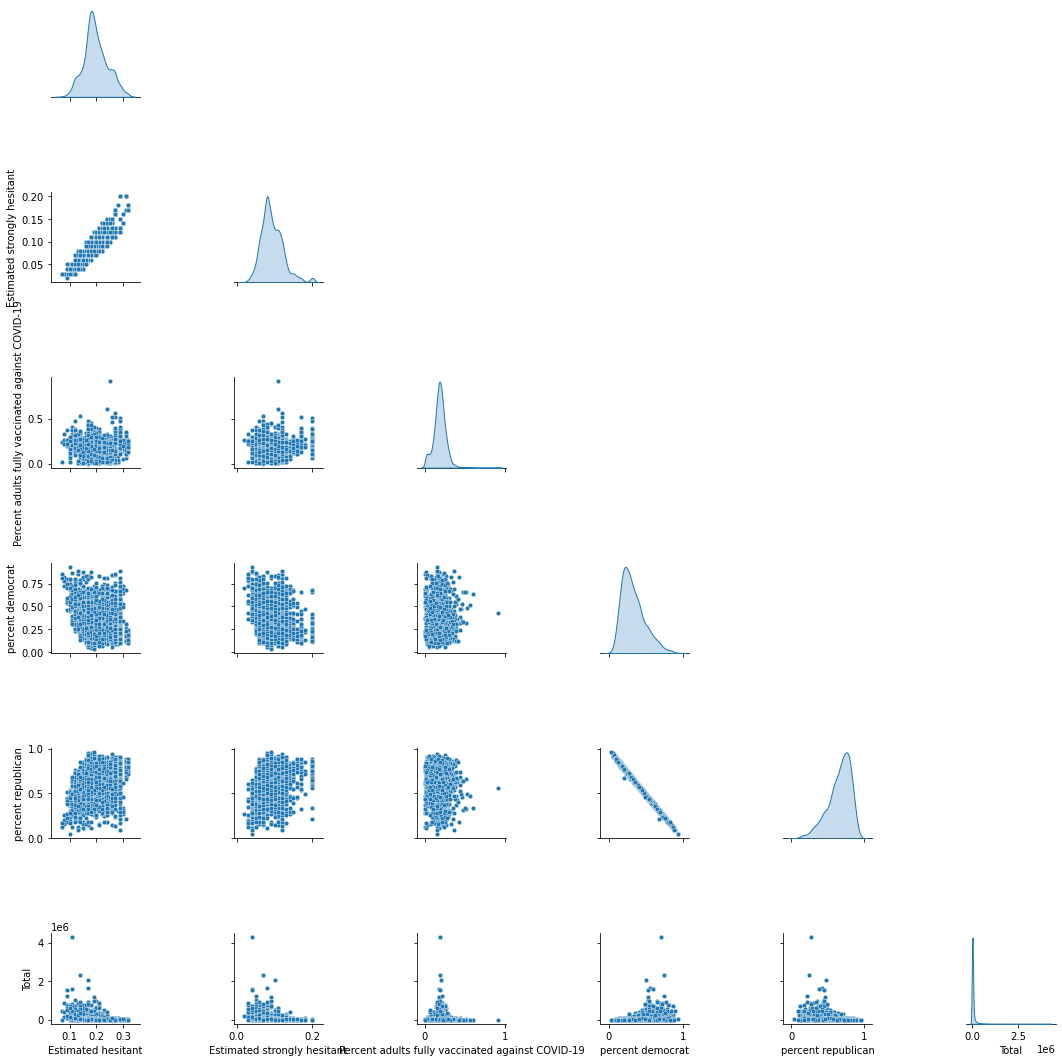

In [17]:
numeric = combined[['Estimated hesitant', 'Estimated strongly hesitant',
                    'Percent adults fully vaccinated against COVID-19', 'percent democrat', 'percent republican', 'Total']]

sns.pairplot(numeric, diag_kind='kde',corner=True, plot_kws={"s": 21})
plt.show()
warnings.filterwarnings("ignore")

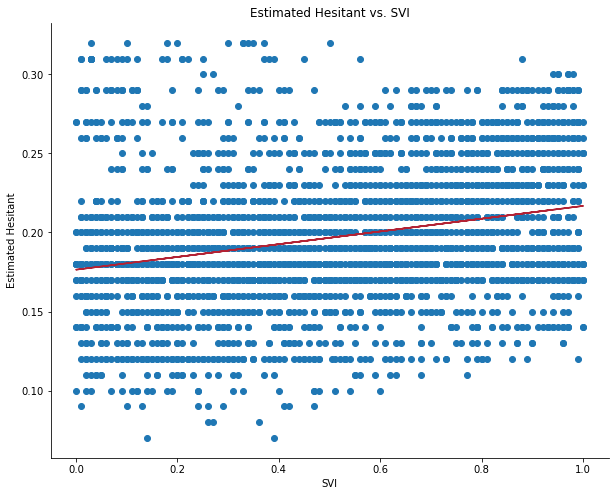

In [18]:
x=combined['Social Vulnerability Index (SVI)']
y=combined['Estimated hesitant']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, m*x+b, color='#B22234')
sns.despine()
plt.title('Estimated Hesitant vs. SVI')
plt.ylabel('Estimated Hesitant'), plt.xlabel('SVI')
plt.show()

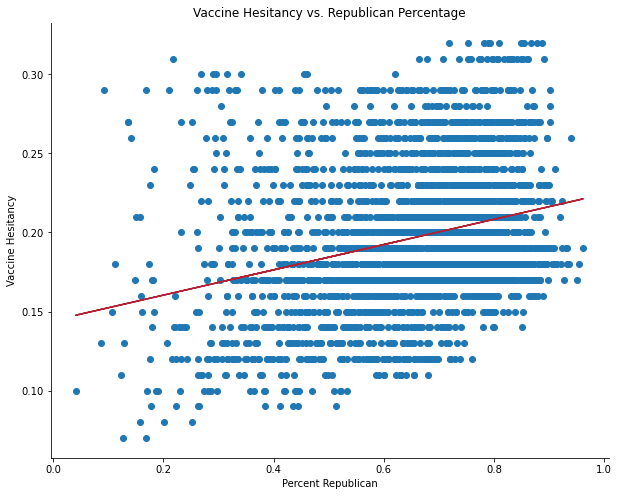

In [19]:
x=combined['percent republican']
y=combined['Estimated hesitant']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, m*x+b, color='#B22234')
sns.despine()
plt.title('Vaccine Hesitancy vs. Republican Percentage')
plt.xlabel('Percent Republican'), plt.ylabel('Vaccine Hesitancy')
plt.show()

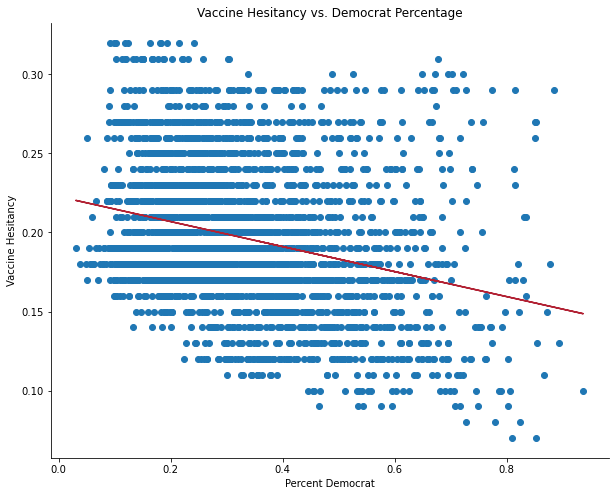

In [20]:
x=combined['percent democrat']
y=combined['Estimated hesitant']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, m*x+b, color='#B22234')
sns.despine()
plt.title('Vaccine Hesitancy vs. Democrat Percentage')
plt.xlabel('Percent Democrat'), plt.ylabel('Vaccine Hesitancy')
plt.show()

In [21]:
combined['political leaning'] = combined['percent republican'] - combined['percent democrat']

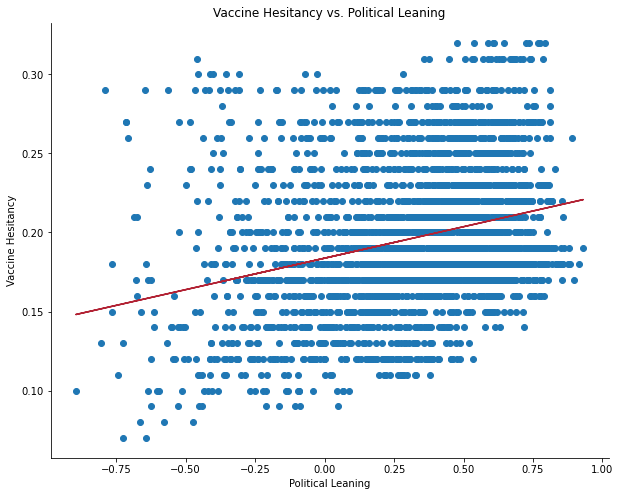

In [57]:
x=combined['political leaning']
y=combined['Estimated hesitant']
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, m*x+b, color='#B22234')
sns.despine()
plt.title('Vaccine Hesitancy vs. Political Leaning')
plt.xlabel('Political Leaning'), plt.ylabel('Vaccine Hesitancy')
plt.show()

In [23]:
progress = combined.drop(['FIPS Code', 'County Name', 'DEM', 'REP', 'GRN', 'LIB', 'percent democrat', 'percent republican', 'percent green', 'percent libertarian', 'Geographical Point', 'State Code', 'County Boundary', 'State Boundary'], axis=1)

In [24]:
progress = progress.replace({'SVI Category': {'Very High Concern':5, 'High Concern':4, 'Moderate Concern':3, 'Low Concern':2,
                                            'Very Low Concern':1}})
progress = progress.replace({'CVAC Level Of Concern': {'Very High Concern':5, 'High Concern':4, 'Moderate Concern':3, 'Low Concern':2, 'Very Low Concern':1}})

In [25]:
progress

,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Total,political leaning
0,Alabama,0.23,0.11,0.93,5,0.94,5,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,5903.0,-0.375233
1,Alabama,0.23,0.11,0.73,4,0.82,5,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,8876.0,0.485128
2,Alabama,0.22,0.11,0.70,4,0.80,4,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,11284.0,0.817175
3,Alabama,0.23,0.11,0.75,4,0.68,4,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,31170.0,0.679115
4,Alabama,0.22,0.10,0.63,4,0.58,3,0.149,0.0372,0.0016,0.0161,0.3189,0.0004,0.6155,90172.0,0.148073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,Wisconsin,0.18,0.11,0.81,5,0.30,2,0.195,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,458971.0,-0.398528
3040,Wisconsin,0.18,0.10,0.28,2,0.31,2,0.294,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,15380.0,0.165670
3041,Wyoming,0.30,0.16,0.25,2,0.63,4,0.192,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,18617.0,-0.027555
3042,Wisconsin,0.17,0.10,0.35,2,0.19,1,0.210,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,11165.0,0.324765


In [26]:
states = pd.get_dummies(progress.State)

In [27]:
states

,Alabama,Arizona,Arkansas,California,Colorado,Delaware,District Of Columbia,Florida,Georgia,Hawaii,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
features = pd.concat([progress, states], axis=1)

In [29]:
features = features.drop(['State', 'Estimated hesitant', 'Estimated strongly hesitant', 'SVI Category', 'CVAC Level Of Concern'], axis=1)
features['Percent adults fully vaccinated against COVID-19'] = features['Percent adults fully vaccinated against COVID-19'].fillna(0.187)
features['Social Vulnerability Index (SVI)'] = features['Social Vulnerability Index (SVI)'].fillna(0.51)
target = progress['Estimated hesitant']

In [30]:
model = LinearRegression()

In [31]:
model.fit(features, target)
predictions = model.predict(features)

In [32]:
test = pd.DataFrame(predictions, target)

In [33]:
test = test.reset_index()

In [34]:
test = test.rename({0:'Prediction'}, axis=1)

In [35]:
test['Difference'] = test['Estimated hesitant'] - test.Prediction

In [36]:
test.Difference.max()

0.08453272986930865

In [37]:
test

,Estimated hesitant,Prediction,Difference
0,0.23,0.233910,-0.003910
1,0.23,0.234846,-0.004846
2,0.22,0.231003,-0.011003
3,0.23,0.227235,0.002765
4,0.22,0.217199,0.002801
...,...,...,...
3039,0.18,0.170731,0.009269
3040,0.18,0.171476,0.008524
3041,0.30,0.295798,0.004202
3042,0.17,0.176909,-0.006909


In [38]:
complete_df = combined
complete_df = complete_df.drop(['FIPS Code', 'SVI Category', 'CVAC Level Of Concern', 'DEM', 'REP', 'GRN', 'LIB', 'percent green', 'percent libertarian', 'Geographical Point', 'State Code', 'County Boundary', 'State Boundary'], axis=1)
complete_df['Predicted hesitant'] = predictions
complete_df['Hesitant Difference'] = complete_df['Estimated hesitant'] - complete_df['Predicted hesitant']

In [39]:
complete_df = complete_df.sort_values(by=['Hesitant Difference'], ascending=False)

In [40]:
complete_df = complete_df[complete_df.Total > 5247]

In [41]:
complete_df.head(10)

,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Total,percent democrat,percent republican,political leaning,Predicted hesitant,Hesitant Difference
1943,"Cibola County, New Mexico",New Mexico,0.26,0.15,1.00,0.71,NaN,0.3836,0.3903,0.0015,0.0088,0.0003,0.1931,8903.0,0.532966,0.446479,-0.086488,0.175467,0.084533
1918,"McKinley County, New Mexico",New Mexico,0.26,0.15,0.99,0.85,NaN,0.1425,0.7351,0.0098,0.0056,0.0004,0.0864,26486.0,0.680699,0.294533,-0.386166,0.192939,0.067061
2512,"Hughes County, South Dakota",South Dakota,0.29,0.12,0.41,0.11,0.176,0.0320,0.1185,0.0002,0.0014,0.0000,0.8222,8723.0,0.338530,0.633039,0.294509,0.228268,0.061732
2106,"Onslow County, North Carolina",North Carolina,0.24,0.09,0.75,0.64,0.213,0.1258,0.0035,0.0209,0.1328,0.0013,0.6614,72235.0,0.335931,0.637890,0.301959,0.186974,0.053026
261,"Navajo County, Arizona",Arizona,0.27,0.17,1.00,1.00,0.368,0.1142,0.4353,0.0059,0.0074,0.0013,0.4128,51783.0,0.451557,0.534094,0.082537,0.219235,0.050765
680,"Blaine County, Idaho",Idaho,0.28,0.13,0.32,0.29,0.330,0.2263,0.0071,0.0085,0.0044,0.0009,0.7463,13244.5,0.673412,0.304428,-0.368983,0.230232,0.049768
255,"Apache County, Arizona",Arizona,0.27,0.17,0.99,1.00,0.515,0.0634,0.7311,0.0034,0.0052,0.0002,0.1821,35183.0,0.662053,0.325214,-0.336839,0.225323,0.044677
2831,"Norfolk city, Virginia",Virginia,0.20,0.08,0.77,0.38,0.133,0.0804,0.0030,0.0349,0.4051,0.0005,0.4344,89881.0,0.716948,0.260823,-0.456125,0.160258,0.039742
1870,"Lewis County, New York",New York,0.19,0.08,0.29,0.19,0.187,0.0173,0.0029,0.0053,0.0070,0.0009,0.9585,12944.0,0.295426,0.687114,0.391687,0.152114,0.037886
532,"Bryan County, Georgia",Georgia,0.27,0.11,0.34,0.60,0.141,0.0708,0.0043,0.0141,0.1385,0.0000,0.7305,21335.0,0.315819,0.667448,0.351629,0.232662,0.037338


In [42]:
complete_df.Total.describe()

count    2.283000e+03
mean     6.459451e+04
std      1.700659e+05
min      5.249000e+03
25%      9.924250e+03
50%      1.863100e+04
75%      4.836350e+04
max      4.263443e+06
Name: Total, dtype: float64

In [43]:
screenshot = complete_df[['County Name', 'State', 'Estimated hesitant', 'Predicted hesitant']]

In [44]:
screenshot['Expected Growth'] = screenshot['Estimated hesitant'] - screenshot['Predicted hesitant']

In [45]:
screenshot.head(10)

,County Name,State,Estimated hesitant,Predicted hesitant,Expected Growth
1943,"Cibola County, New Mexico",New Mexico,0.26,0.175467,0.084533
1918,"McKinley County, New Mexico",New Mexico,0.26,0.192939,0.067061
2512,"Hughes County, South Dakota",South Dakota,0.29,0.228268,0.061732
2106,"Onslow County, North Carolina",North Carolina,0.24,0.186974,0.053026
261,"Navajo County, Arizona",Arizona,0.27,0.219235,0.050765
680,"Blaine County, Idaho",Idaho,0.28,0.230232,0.049768
255,"Apache County, Arizona",Arizona,0.27,0.225323,0.044677
2831,"Norfolk city, Virginia",Virginia,0.20,0.160258,0.039742
1870,"Lewis County, New York",New York,0.19,0.152114,0.037886
532,"Bryan County, Georgia",Georgia,0.27,0.232662,0.037338


In [46]:
df

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1131,"Wilcox County, Alabama",Alabama,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1129,"Washington County, Alabama",Alabama,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1133,"Winston County, Alabama",Alabama,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1127,"Walker County, Alabama",Alabama,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,2013,"Aleutians East Borough, Alaska",Alaska,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,POINT (-151.631889 63.631126),AK,"MULTIPOLYGON (((-165.036163 54.576598, -165.01...","MULTIPOLYGON (((-165.254162 60.917108, -165.30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",Wisconsin,0.18,0.11,0.81,Very High Concern,0.30,Low Concern,0.195,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-87.994171 43.19255, -87.99331...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3138,55121,"Trempealeau County, Wisconsin",Wisconsin,0.18,0.10,0.28,Low Concern,0.31,Low Concern,0.294,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3139,56001,"Albany County, Wyoming",Wyoming,0.30,0.16,0.25,Low Concern,0.63,High Concern,0.192,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,POINT (-107.55145 42.999627),WY,MULTIPOLYGON (((-106.071399 41.530719999999995...,"MULTIPOLYGON (((-111.044893 43.315719, -111.04..."
3140,55067,"Langlade County, Wisconsin",Wisconsin,0.17,0.10,0.35,Low Concern,0.19,Very Low Concern,0.210,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-89.42472 45.293175, -89.42473...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


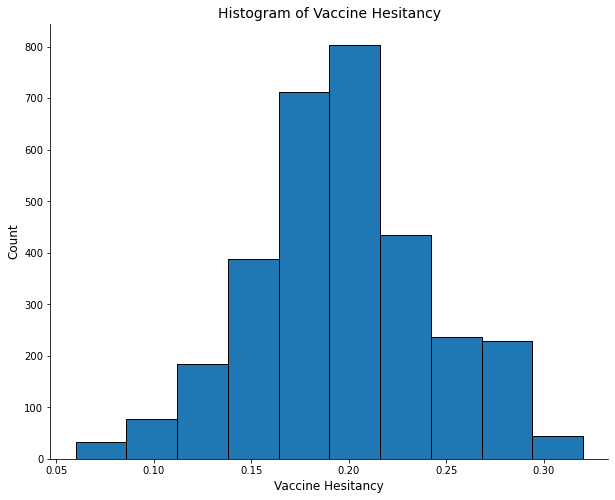

In [54]:
plt.figure(figsize=(10,8))
plt.hist(df['Estimated hesitant'], edgecolor='k')
sns.despine()
plt.title('Histogram of Vaccine Hesitancy', fontsize=14)
plt.xlabel('Vaccine Hesitancy', fontsize=12), plt.ylabel('Count', fontsize=12)
plt.show()

In [56]:
df.isnull().sum()

FIPS Code                                                  0
County Name                                                0
State                                                      0
Estimated hesitant                                         0
Estimated strongly hesitant                                0
Social Vulnerability Index (SVI)                           1
SVI Category                                               0
CVAC level of concern for vaccination rollout              0
CVAC Level Of Concern                                      0
Percent adults fully vaccinated against COVID-19         316
Percent Hispanic                                           0
Percent non-Hispanic American Indian/Alaska Native         0
Percent non-Hispanic Asian                                 0
Percent non-Hispanic Black                                 0
Percent non-Hispanic Native Hawaiian/Pacific Islander      0
Percent non-Hispanic White                                 0
Geographical Point      